In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
# Problem 1

In [3]:
orders = pd.read_csv("Orders.csv")

In [8]:
temp_profit = [re.sub('\$','',x) for x in orders['Profit']]

In [9]:
temp_profit = [re.sub(',','',x) for x in temp_profit]

In [10]:
temp_profit = [float(x) for x in temp_profit]

In [11]:
orders['Profit'] = temp_profit

In [12]:
temp_sales = [re.sub('\$','',x) for x in orders['Sales']]
temp_sales = [re.sub(',','',x) for x in temp_sales]
temp_sales = [float(x) for x in temp_sales]
orders['Sales'] = temp_sales

In [13]:
np.sum(orders.isnull()) # Everything is there except the postal code. We'll see what we are gonna do with it later.

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [198]:
# Problem 2

In [199]:
date1 = orders['Order.Date'][0]
date1

'11/11/14'

In [38]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [201]:
month = [x.month for x in orders['Order.Date']]

In [202]:
orders['month'] = month

In [203]:
temp = pd.DataFrame(orders.groupby(month).mean()['Quantity'])

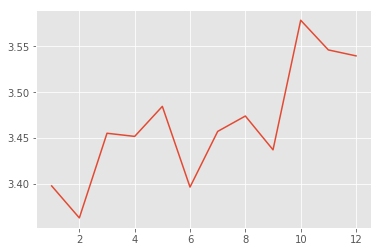

In [204]:
plt.plot(temp)

In [205]:
temp2 = pd.DataFrame(orders.groupby(['Category','month']).mean()['Quantity'])

In [206]:
temp2 = temp2.reset_index()

In [207]:
temp2

,Category,month,Quantity
0,Furniture,1,3.564155
1,Furniture,2,3.523585
2,Furniture,3,3.655052
3,Furniture,4,3.523726
4,Furniture,5,3.483871
5,Furniture,6,3.444333
6,Furniture,7,3.490291
7,Furniture,8,3.504009
8,Furniture,9,3.492778
9,Furniture,10,3.557816


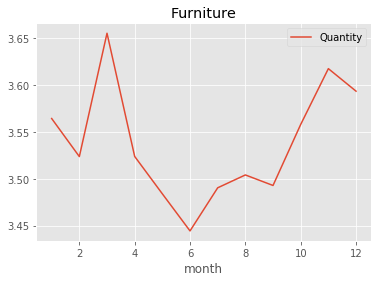

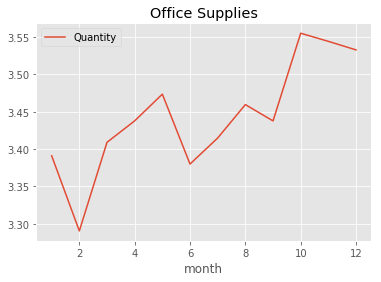

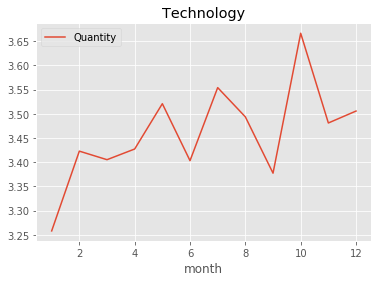

In [208]:
for title,group in temp2.groupby('Category'):
    group.plot(x='month', y='Quantity', title=title)

In [209]:
# Problem 3

In [210]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11


In [4]:
returns = pd.read_csv("Returns.csv")

In [5]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [6]:
temp3 = orders.groupby('Order.ID').sum()

In [7]:
temp3 = temp3.reset_index()

In [14]:
temp3 = temp3.rename(columns = {'Order.ID':'ID'})
returns = returns.rename(columns = {'Order ID':'ID'})

In [15]:
list(temp3)

['ID', 'Row.ID', 'Postal.Code', 'Quantity', 'Discount', 'Shipping.Cost']

In [16]:
list(returns)

['Returned', 'ID', 'Region']

In [17]:
returns.head()

,Returned,ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [18]:
oceania = orders[orders['Region']=='Oceania']

In [19]:
newdata = pd.merge(returns,temp3,on='ID',how = 'inner')

In [20]:
newdata.head()

,Returned,ID,Region,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
0,Yes,CA-2012-SA20830140-41210,Central US,31784,60610.0,6,0.2,752.51
1,Yes,IN-2012-PB19210127-41259,Eastern Asia,241524,0.0,25,0.0,2076.62
2,Yes,CA-2012-SC20095140-41174,Central US,141578,221628.0,17,0.0,699.91
3,Yes,IN-2015-JH158207-42140,Oceania,101758,0.0,10,0.4,656.78
4,Yes,IN-2014-LC168857-41747,Oceania,29629,0.0,5,0.1,511.47


In [40]:
orders = orders.rename(columns = {'Order.ID':'ID'})

In [41]:
orders = orders.reset_index()

In [42]:
newdata2 = pd.merge(orders, returns,on="ID",how = "inner")

ValueError: can not merge DataFrame with instance of type <class 'float'>

In [24]:
profitlist = list(newdata2['Quantity']*newdata2['Profit'])

In [25]:
profitlist

[1440.72,
 768.75,
 935.5500000000001,
 573.0,
 204.66,
 42.12,
 26.52,
 18.96,
 4294.5,
 143.52,
 21.16,
 3.15,
 15.7,
 2935.9500000000003,
 -2295.36,
 -355.15,
 889.98,
 835.92,
 0.0,
 1781.73,
 5.37,
 5778.24,
 1953.0,
 -18643.100000000002,
 -341.28,
 -24.64,
 -2091.12,
 -29.68,
 2856.0,
 236.52,
 1381.8600000000001,
 456.96,
 51.24,
 147.84,
 2.67,
 863.76,
 -10424.48,
 -37.14,
 10584.0,
 382.64,
 75.78,
 -1338.12,
 905.1,
 190.08,
 27.0,
 47.25,
 -21.330000000000002,
 2589.0,
 2292.48,
 204.75,
 2.1,
 1509.12,
 14.7,
 14.4,
 22.2,
 3525.93,
 109.32,
 9.12,
 3317.3700000000003,
 169.44,
 402.78,
 8147.160000000001,
 35.64,
 998.32,
 2461.32,
 503.82,
 140.76,
 360.12,
 5.04,
 829.0799999999999,
 37.23,
 2.43,
 -1335.33,
 65.96,
 -6.08,
 47.72,
 4.38,
 -0.12,
 54.0,
 753.5999999999999,
 27.990000000000002,
 493.56000000000006,
 1020.1800000000001,
 279.99,
 96.48,
 164.43,
 -2235.9,
 1458.0,
 52.2,
 2029.3200000000002,
 -446.32,
 5955.88,
 1639.5,
 95.76,
 238.5,
 152.88,
 -270.28,


In [26]:
sum(profitlist)

299219.4700000003

In [27]:
newdata2

,index,Row.ID,ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,26,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.00,720.36,725.570,Critical,Yes,Eastern Asia
1,53,30190,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.00,153.75,627.270,Critical,Yes,Eastern Asia
2,163,30187,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.00,311.85,458.970,Critical,Yes,Eastern Asia
3,991,30193,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.00,114.60,203.920,Critical,Yes,Eastern Asia
4,12416,30189,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Machines,"Okidata Calculator, Red",148.32,3,0.00,68.22,25.480,Critical,Yes,Eastern Asia
5,16121,30194,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Binders,"Acco Binder, Economy",45.45,3,0.00,14.04,17.730,Critical,Yes,Eastern Asia
6,19917,30188,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Envelopes,"Ames Interoffice Envelope, Security-Tint",95.04,2,0.00,13.26,12.590,Critical,Yes,Eastern Asia
7,30944,30192,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Labels,"Harbour Creations Shipping Labels, 5000 Label Set",23.70,2,0.00,9.48,5.090,Critical,Yes,Eastern Asia
8,75,25438,IN-2015-JH158207-42140,5/16/15,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,...,Phones,"Apple Smart Phone, Cordless",2863.35,5,0.10,858.90,581.880,Critical,Yes,Oceania
9,6049,25441,IN-2015-JH158207-42140,5/16/15,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,...,Accessories,"Enermax Memory Card, Erganomic",201.96,2,0.10,71.76,55.870,Critical,Yes,Oceania


In [28]:
len(newdata2['ID'])

2220

In [29]:
len(set(newdata2['ID']))

1079

In [30]:
orders.shape

(51290, 25)

In [33]:
returns = sum(newdata2['Profit'])

In [34]:
all = sum(orders['Profit'])

In [36]:
ratio = returns/all

In [37]:
ratio

0.04182116668562374

In [44]:
newdata2['Order.Date'] = pd.to_datetime(newdata2['Order.Date'])

In [45]:
year = [x.year for x in newdata2['Order.Date']]

In [47]:
newdata2['year'] = year

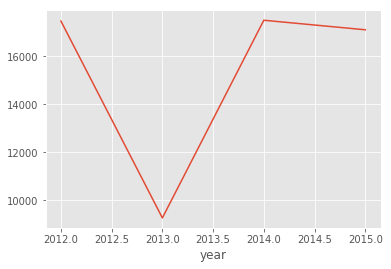

In [49]:
newdata2.groupby('year').sum()['Profit'].plot()

In [50]:
list(newdata2)

['index',
 'Row.ID',
 'ID',
 'Order.Date',
 'Ship.Date',
 'Ship.Mode',
 'Customer.ID',
 'Customer.Name',
 'Segment',
 'Postal.Code',
 'City',
 'State',
 'Country',
 'Region_x',
 'Market',
 'Product.ID',
 'Category',
 'Sub.Category',
 'Product.Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping.Cost',
 'Order.Priority',
 'Returned',
 'Region_y',
 'year']

In [53]:
customer = newdata2.groupby('Customer.ID').count()['Customer.Name']

In [54]:
customer = customer.reset_index()

In [58]:
customer[customer['Customer.Name']>1].shape

(547, 2)

In [60]:
customer[customer['Customer.Name']>5].shape

(46, 2)

In [66]:
region = newdata2.groupby('Region_y').count()['index']
region = region.reset_index()
region.sort_values(by = ['index'],ascending = False)

,Region_y,index
2,Central America,248
22,Western Europe,233
23,Western US,180
12,Oceania,154
14,Southeastern Asia,140
9,Eastern US,134
13,South America,133
6,Eastern Asia,131
17,Southern Europe,112
16,Southern Asia,111


In [67]:
list(newdata2)

['index',
 'Row.ID',
 'ID',
 'Order.Date',
 'Ship.Date',
 'Ship.Mode',
 'Customer.ID',
 'Customer.Name',
 'Segment',
 'Postal.Code',
 'City',
 'State',
 'Country',
 'Region_x',
 'Market',
 'Product.ID',
 'Category',
 'Sub.Category',
 'Product.Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping.Cost',
 'Order.Priority',
 'Returned',
 'Region_y',
 'year']

In [69]:
categories = newdata2.groupby('Sub.Category').count()['index']
categories = categories.reset_index()
categories.sort_values(by=['index'],ascending = False)

,Sub.Category,index
3,Binders,269
2,Art,217
14,Storage,212
12,Paper,150
5,Chairs,147
13,Phones,145
0,Accessories,138
10,Labels,137
9,Furnishings,135
4,Bookcases,104
